<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-pre-processing" data-toc-modified-id="Data-pre-processing-1">Data pre-processing</a></span></li><li><span><a href="#Baseline" data-toc-modified-id="Baseline-2">Baseline</a></span></li><li><span><a href="#Decision-Trees" data-toc-modified-id="Decision-Trees-3">Decision Trees</a></span><ul class="toc-item"><li><span><a href="#Initial-trees" data-toc-modified-id="Initial-trees-3.1">Initial trees</a></span></li><li><span><a href="#Hyperparameter-tuning" data-toc-modified-id="Hyperparameter-tuning-3.2">Hyperparameter tuning</a></span></li></ul></li><li><span><a href="#Random-forests" data-toc-modified-id="Random-forests-4">Random forests</a></span><ul class="toc-item"><li><span><a href="#Initial-forests" data-toc-modified-id="Initial-forests-4.1">Initial forests</a></span></li><li><span><a href="#Hyperparameter-tuning" data-toc-modified-id="Hyperparameter-tuning-4.2">Hyperparameter tuning</a></span></li><li><span><a href="#Tuning-the-number-of-trees" data-toc-modified-id="Tuning-the-number-of-trees-4.3">Tuning the number of trees</a></span></li><li><span><a href="#OOB-error" data-toc-modified-id="OOB-error-4.4">OOB error</a></span></li><li><span><a href="#Overfitting?" data-toc-modified-id="Overfitting?-4.5">Overfitting?</a></span></li></ul></li><li><span><a href="#Model-interpretation" data-toc-modified-id="Model-interpretation-5">Model interpretation</a></span><ul class="toc-item"><li><span><a href="#Tree-variance-for-prediction-confidence" data-toc-modified-id="Tree-variance-for-prediction-confidence-5.1">Tree variance for prediction confidence</a></span></li><li><span><a href="#Feature-importance" data-toc-modified-id="Feature-importance-5.2">Feature importance</a></span></li><li><span><a href="#Removing-low-importance-features" data-toc-modified-id="Removing-low-importance-features-5.3">Removing low-importance features</a></span></li><li><span><a href="#Remove-redundant-features" data-toc-modified-id="Remove-redundant-features-5.4">Remove redundant features</a></span></li><li><span><a href="#Partial-dependance" data-toc-modified-id="Partial-dependance-5.5">Partial dependance</a></span></li><li><span><a href="#Tree-Interperator" data-toc-modified-id="Tree-Interperator-5.6">Tree Interperator</a></span></li><li><span><a href="#Finding-Out-of-Domain-Data" data-toc-modified-id="Finding-Out-of-Domain-Data-5.7">Finding Out-of-Domain Data</a></span></li><li><span><a href="#Imbalanced-learn" data-toc-modified-id="Imbalanced-learn-5.8">Imbalanced learn</a></span></li><li><span><a href="#RandomUnderSampler" data-toc-modified-id="RandomUnderSampler-5.9">RandomUnderSampler</a></span></li><li><span><a href="#RandomOverSampler" data-toc-modified-id="RandomOverSampler-5.10">RandomOverSampler</a></span></li></ul></li></ul></div>

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# Data pre-processing

In [2]:
from fastbook import *
from utils import *
from fastai.tabular.all import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
#from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG
from pandas.api.types import is_string_dtype, is_numeric_dtype, is_categorical_dtype
from sklearn.metrics import accuracy_score, roc_auc_score 

path = Path('/Users/baranserajelahi/Codes/fraud-detection-pytorch-scikit-fastai/data')
Path.BASE_PATH = path
pd.options.display.max_rows = 200
pd.options.display.max_columns = 150

In [51]:
train_ss = pd.read_csv(path/'train_ss.csv', index_col=[0], low_memory=False)

In [52]:
train_ss.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
44771,3031771,0,1087364,117.00,W,12932,361.0,150.0,visa,226.0,debit,204.0,87.0,8.0,NaN,gmail.com,NaN,4.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0,3.0,0.0,2.0,0.0,14.0,4.0,8.0,8.0,1.0,225.0,1.0,NaN,NaN,NaN,NaN,8.0,232.0,NaN,NaN,NaN,113.0,T,T,T,M0,F,F,F,F,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
271831,3258831,0,6592563,22.96,C,5740,555.0,144.0,mastercard,224.0,credit,NaN,NaN,NaN,NaN,msn.com,msn.com,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,M0,NaN,NaN,NaN,NaN,NaN,-5.0,192686.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,100.0,NotFound,52.0,NaN,New,NotFound,102.0,15.0,340.0,474.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 63.0,NaN,NaN,NaN,F,F,T,F,desktop,Windows
295064,3282064,0,7288908,24.50,W,7826,481.0,150.0,mastercard,224.0,debit,325.0,87.0,NaN,NaN,NaN,NaN,1.0,3.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,14.0,1.0,324.0,324.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,15.0,NaN,NaN,NaN,NaN,15.0,NaN,NaN,NaN,M1,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
248994,3235994,0,5938446,100.00,R,11156,399.0,150.0,american express,223.0,credit,325.0,87.0,NaN,NaN,gmail.com,gmail.com,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.0,128724.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,100.0,NotFound,49.0,-300.0,New,NotFound,166.0,NaN,529.0,549.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Mac OS X 10.10,firefox 57.0,24.0,1280x720,match_status:2,T,F,T,F,desktop,rv:57.0
22055,3009055,0,579537,250.00,R,15063,514.0,150.0,visa,226.0,credit,310.0,87.0,NaN,74.0,gmail.com,anonymous.com,3.0,1.0,0.0,1.0,0.0,2.0,0.0,2.0,0.0,2.0,1.0,0.0,2.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.0,142308.0,NaN,NaN,0.0,-8.0,NaN,NaN,NaN,NaN,100.0,NotFound,49.0,-420.0,New,NotFound,166.0,NaN,372.0,225.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Mac OS X 10_8_5,safari generic,24.0,2560x1440,match_status:2,T,F,F,F,desktop,MacOS


In [4]:
train_ss.shape

(59054, 95)

In [5]:
train_ss.columns

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6',
       'addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain', 'R_emaildomain',
       'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11',
       'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8',
       'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'M1', 'M2', 'M3', 'M4',
       'M5', 'M6', 'M7', 'M8', 'M9', 'id_01', 'id_02', 'id_03', 'id_04',
       'id_05', 'id_06', 'id_07', 'id_08', 'id_09', 'id_10', 'id_11', 'id_12',
       'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20',
       'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28',
       'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36',
       'id_37', 'id_38', 'DeviceType', 'DeviceInfo'],
      dtype='object')

In [7]:
train_ss['isFraud']

44771     0
271831    0
295064    0
248994    0
22055     0
         ..
5077      0
253533    0
10973     0
380298    0
420843    0
Name: isFraud, Length: 59054, dtype: int64

To create a validation set we will take rows with transaction numbers greater than a certain value. These rows are transactions that occur later. This seems like a good idea since the test set consists of transactions that happen in the future with respect to our data set.

In [53]:
# The rows with TransactionDT <= 12579058 comprise the first 80% of the data (approximately)
cut_off = math.floor((train_ss['TransactionDT'].max() - train_ss['TransactionDT'].min())*0.8)
cut_off

12579507

In [54]:
cond = train_ss['TransactionDT'] <= cut_off
train_idx = np.where( cond)[0]
valid_idx = np.where(~cond)[0]

splits = (list(train_idx),list(valid_idx))

In [55]:
cat = ['ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 
       'addr1', 'addr2', 'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 
       'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'DeviceType', 'DeviceInfo', 'id_12', 
       'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 
       'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 
       'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36',
       'id_37', 'id_38'] 
cont = ['TransactionID', 'TransactionDT', 'TransactionAmt',
        'dist1', 'dist2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 
        'C10', 'C11','C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 
        'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'id_01', 'id_02', 
        'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08', 'id_09', 'id_10', 
        'id_11']
dep_var = 'isFraud'


In [56]:
len(cont),len(cat)

(45, 49)

In [57]:
assert len(cat)+len(cont)==(len(train_ss.columns)-1)

In [58]:
procs = [Categorify, FillMissing]

Categorify replaces categorical columns with numerical categorical columns. FillMissing replaces missing values with the median of the column and creates a new Boolean column that records whether data was missing.

In [59]:
to = TabularPandas(train_ss, procs, cat, cont, y_names=dep_var, splits=splits)

In [60]:
to.show()

,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,P_emaildomain,R_emaildomain,M1,M2,M3,M4,M5,M6,M7,M8,M9,DeviceType,DeviceInfo,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,dist1_na,dist2_na,D1_na,D2_na,D3_na,D4_na,D5_na,D6_na,D7_na,D8_na,D9_na,D10_na,D11_na,D12_na,D13_na,D14_na,D15_na,id_01_na,id_02_na,id_03_na,id_04_na,id_05_na,id_06_na,id_07_na,id_08_na,id_09_na,id_10_na,id_11_na,TransactionID,TransactionDT,TransactionAmt,dist1,dist2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,isFraud
44771,W,12932,361,150,visa,226,debit,204,87,gmail.com,#na#,T,T,T,M0,F,F,F,F,T,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,False,True,False,False,False,False,False,True,True,True,True,False,False,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,3031771,1087364,117.000000,8.0,32.0,4.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0,3.0,0.0,2.0,0.0,14.0,4.0,8.0,8.0,1.0,225.0,1.0,0.0,0.0,44.625000,0.666666,8.0,232.0,0.0,0.0,0.0,113.0,-5.0,123901.0,0.0,0.0,0.0,0.0,15.0,-33.0,0.0,0.0,100.0,0
271831,C,5740,555,144,mastercard,224,credit,#na#,#na#,msn.com,msn.com,#na#,#na#,#na#,M0,#na#,#na#,#na#,#na#,#na#,desktop,Windows,NotFound,52,#na#,New,NotFound,102,15,340,474,#na#,#na#,#na#,#na#,#na#,#na#,#na#,New,NotFound,#na#,chrome 63.0,#na#,#na#,#na#,F,F,T,F,True,True,False,True,True,False,True,False,True,True,True,False,True,False,False,False,False,False,False,True,True,False,False,True,True,True,True,False,3258831,6592563,22.959999,8.0,32.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,99.0,8.0,0.0,10.0,0.0,0.0,44.625000,0.666666,0.0,37.0,0.0,0.0,0.0,0.0,-5.0,192686.0,0.0,0.0,0.0,0.0,15.0,-33.0,0.0,0.0,100.0,0
295064,W,7826,481,150,mastercard,224,debit,325,87,#na#,#na#,#na#,#na#,#na#,M1,T,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,True,True,False,False,False,True,True,True,True,True,True,False,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,3282064,7288908,24.500000,8.0,32.0,1.0,3.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,14.0,1.0,324.0,324.0,5.0,24.0,10.0,0.0,0.0,44.625000,0.666666,15.0,37.0,0.0,0.0,0.0,15.0,-5.0,123901.0,0.0,0.0,0.0,0.0,15.0,-33.0,0.0,0.0,100.0,0
248994,R,11156,399,150,american express,223,credit,325,87,gmail.com,gmail.com,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,desktop,rv:57.0,NotFound,49,-300,New,NotFound,166,#na#,529,549,#na#,#na#,#na#,#na#,#na#,#na#,#na#,New,NotFound,Mac OS X 10.10,firefox 57.0,24,1280x720,match_status:2,T,F,T,F,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,True,True,False,False,True,True,True,True,False,3235994,5938446,100.000000,8.0,32.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,99.0,8.0,24.0,10.0,0.0,0.0,44.625000,0.666666,12.0,37.0,0.0,0.0,0.0,48.0,-5.0,128724.0,0.0,0.0,0.0,0.0,15.0,-33.0,0.0,0.0,100.0,0
22055,R,15063,514,150,visa,226,credit,310,87,gmail.com,anonymous.com,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,desktop,MacOS,NotFound,49,-420,New,NotFound,166,#na#,372,225,#na#,#na#,#na#,#na#,#na#,#na#,#na#,New,NotFound,Mac OS X 10_8_5,safari generic,24,2560x1440,match_status:2,T,F,F,F,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,True,True,False,False,True,True,True,True,False,3009055,579537,250.000000,8.0,74.0,3.0,1.0,0.0,1.0,0.0,2.0,0.0,2.0,0.0,2.0,1.0,0.0,2.0,2.0,0.0,99.0,8.0,24.0,10.0,0.0,0.0,44.625000,0.666666,12.0,37.0,0.0,0.0,0.0,48.0,-5.0,142308.0,0.0,0.0,0.0,-8.0,15.0,-33.0,0.0,0.0,100.0,0
109762,R,6741,583,150,visa,195,credit,330,87,icloud.com,anonymous.com,#na#,

In [61]:
to.items.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,id_01,id_02,id_03,id_04,id_05,...,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,dist1_na,dist2_na,D1_na,D2_na,D3_na,D4_na,D5_na,D6_na,D7_na,D8_na,D9_na,D10_na,D11_na,D12_na,D13_na,D14_na,D15_na,id_01_na,id_02_na,id_03_na,id_04_na,id_05_na,id_06_na,id_07_na,id_08_na,id_09_na,id_10_na,id_11_na
44771,3031771,0,1087364,117.000000,5,3850,261,32,4,70,2,39,33,8.0,32.0,17,0,4.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0,3.0,0.0,2.0,0.0,14.0,4.0,8.0,8.0,1.0,225.0,1.0,0.0,0.0,44.625,0.666666,8.0,232.0,0.0,0.0,0.0,113.0,2,2,2,1,1,1,1,1,2,-5.0,123901.0,0.0,0.0,0.0,...,0.0,0.0,100.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1,1,1,1,1,2,2,2,2,1,1,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2
271831,3258831,0,6592563,22.959999,1,1532,455,27,3,68,1,0,0,8.0,32.0,32,32,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,99.0,8.0,0.0,10.0,0.0,0.0,44.625,0.666666,0.0,37.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,-5.0,192686.0,0.0,0.0,0.0,...,0.0,0.0,100.0,2,26,0,2,2,2,5,137,136,0,0,0,0,0,0,0,2,2,0,37,0,0,0,1,1,2,1,1,734,2,2,1,2,2,1,2,1,2,2,2,1,2,1,1,1,1,1,1,2,2,1,1,2,2,2,2,1
295064,3282064,0,7288908,24.500000,5,2212,381,32,3,68,2,73,33,8.0,32.0,0,0,1.0,3.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,14.0,1.0,324.0,324.0,5.0,24.0,10.0,0.0,0.0,44.625,0.666666,15.0,37.0,0.0,0.0,0.0,15.0,0,0,0,2,2,0,0,0,0,-5.0,123901.0,0.0,0.0,0.0,...,0.0,0.0,100.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,1,1,1,2,2,2,2,2,2,1,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2
248994,3235994,0,5938446,100.000000,3,3290,299,32,1,67,1,73,33,8.0,32.0,17,17,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,99.0,8.0,24.0,10.0,0.0,0.0,44.625,0.666666,12.0,37.0,0.0,0.0,0.0,48.0,0,0,0,0,0,0,0,0,0,-5.0,128724.0,0.0,0.0,0.0,...,0.0,0.0,100.0,2,24,6,2,2,33,0,254,162,0,0,0,0,0,0,0,2,2,15,65,2,21,3,2,1,2,1,1,799,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,2,2,1,1,2,2,2,2,1
22055,3009055,0,579537,250.000000,3,4540,414,32,4,70,1,70,33,8.0,74.0,17,2,3.0,1.0,0.0,1.0,0.0,2.0,0.0,2.0,0.0,2.0,1.0,0.0,2.0,2.0,0.0,99.0,8.0,24.0,10.0,0.0,0.0,44.625,0.666666,12.0,37.0,0.0,0.0,0.0,48.0,0,0,0,0,0,0,0,0,0,-5.0,142308.0,0.0,0.0,0.0,...,0.0,0.0,100.0,2,24,4,2,2,33,0,159,45,0,0,0,0,0,0,0,2,2,40,97,2,86,3,2,1,1,1,1,310,2,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,2,2,1,1,2,2,2,2,1


In [62]:
to['addr1'], type(train_ss['addr1'].iloc[0])

(44771      39
 271831      0
 295064     73
 248994     73
 22055      70
          ... 
 511411     39
 588799      0
 556655    109
 483712     78
 590071     40
 Name: addr1, Length: 59054, dtype: int16,
 numpy.float64)

Categorical features have been label encoded and memory reduction applied.

In [63]:
to.cat_names

(#77) ['ProductCD','card1','card2','card3','card4','card5','card6','addr1','addr2','P_emaildomain'...]

In [64]:
to.cont_names

(#45) ['TransactionID','TransactionDT','TransactionAmt','dist1','dist2','C1','C2','C3','C4','C5'...]

In [65]:
to.classes['card1']

(#5644) ['#na#',1001,1004,1012,1013,1015,1018,1021,1022,1027...]

In [66]:
to.train.xs.shape[1]

122

In [67]:
assert (len(to.cont_names)+len(to.cat_names)+1)==to.items.shape[1]

In [68]:
(path/'to_ss.pkl').save(to)

In [3]:
to = (path/'to_ss.pkl').load()

In [4]:
xs, y             = to.train.xs, to.train.y
valid_xs, valid_y = to.valid.xs, to.valid.y

In [7]:
xs.shape, valid_xs.shape

((48357, 122), (10697, 122))

The number of columns has increased from 95 to 122 because the FillMissing proc has created new columns to indicate where data was missing.

In [8]:
np.array(xs.columns.to_list())

array(['ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'DeviceType',
       'DeviceInfo', 'id_12', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 'id_30',
       'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'dist1_na', 'dist2_na', 'D1_na', 'D2_na', 'D3_na', 'D4_na', 'D5_na', 'D6_na', 'D7_na', 'D8_na', 'D9_na', 'D10_na',
       'D11_na', 'D12_na', 'D13_na', 'D14_na', 'D15_na', 'id_01_na', 'id_02_na', 'id_03_na', 'id_04_na', 'id_05_na', 'id_06_na', 'id_07_na', 'id_08_na', 'id_09_na', 'id_10_na', 'id_11_na',
       'TransactionID', 'TransactionDT', 'TransactionAmt', 'dist1', 'dist2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5',
       'D6', 'D7', 'D8', 'D9', 'D10

# Baseline

The evaluation metric for this competition was roc_auc_score. Gaussian Naive Bayes is a reasonable baseline model for tabular data, and its roc_auc_score is well defined.

In [18]:
from sklearn.naive_bayes import GaussianNB

In [19]:
gnb = GaussianNB()

In [20]:
baseline_pred = gnb.fit(xs, y).predict_proba(valid_xs)

In [21]:
baseline_pred[:,1]

array([0.00010619, 0.00041698, 0.00058744, ..., 0.00084944, 0.02236721, 0.00105125])

In [29]:
train_ss.shape

(59054, 95)

In [22]:
roc_auc_score(valid_y, baseline_pred[:,1])

0.7475553456041497

# Decision Trees

## Initial trees

In [128]:
m = DecisionTreeClassifier()
m.fit(xs, y)
m_roc(y, xs), m_roc(valid_y, valid_xs)

(1.0, 0.6433748845194571)

With default values, the tree appears to overfit. It does worse than the baseline Naive Bayes model. So let's try to prevent overfitting by tuning down the max_leaf_nodes parameter.

In [135]:
m = DecisionTreeClassifier(max_leaf_nodes=5000, max_features='sqrt')
m.fit(xs, y)
m_roc(y, xs), m_roc(valid_y, valid_xs)

(1.0, 0.6244316263586138)

In [141]:
m = DecisionTreeClassifier(max_leaf_nodes=500, max_features='sqrt')
m.fit(xs, y)
m_roc(y, xs), m_roc(valid_y, valid_xs)

(0.8696569769588937, 0.700976448512035)

In [173]:
m = DecisionTreeClassifier(max_leaf_nodes=200, max_features='sqrt')
m.fit(xs, y)
m_roc(y, xs), m_roc(valid_y, valid_xs)

(0.7773570183092178, 0.720108662938139)

In [174]:
m = DecisionTreeClassifier(max_leaf_nodes=100, max_features='sqrt')
m.fit(xs, y)
m_roc(y, xs), m_roc(valid_y, valid_xs)

(0.7892035846350229, 0.7486152803331074)

In [176]:
m = DecisionTreeClassifier(max_leaf_nodes=50, max_features='sqrt')
m.fit(xs, y)
m_roc(y, xs), m_roc(valid_y, valid_xs)

(0.7883641125037808, 0.7804160701807646)

With max_leaf_nodes=50 the decision tree beats the baseline model. However, there was a lot of variance in the prediction of decision trees trained with a given parameter set.

## Hyperparameter tuning

Hyperparameters:

[source](https://towardsdatascience.com/how-to-tune-a-decision-tree-f03721801680)
1. criterion='entropy' or criterion='gini': entropy seems to work a little better!
2. splitter='best' or splitter='random': use best unless there is an overfitting problem, than consider 'random' 
   (still random splitting doesn't seem to me like the first thing to combat overfitting.
3. max_depth='None': I will instead control the depth of the tree using max_leaf_nodes, min_samples_leaf and min_samples_split.
4. min_samples_split: ideal value for CART algorithim implemented in scikit is in [1,40].
5. min_samples_leaf: ideal value for CART algorithim implemented in scikit is in [1,20].
6. min_weight_fraction_leaf: after setting sample_weights this will help deal with the class imbalance
7. max_features='sqrt', 'log2', 'None': just try them.
8. min_impurity_decrease: leave it at 0.
9. class_weight='balanced': sometimes leads to better results with imbalanced data.

In [7]:
#Returns the roc_auc_score of the model using the predicted fraud probabilities
def m_roc(y, xs):
    preds = m.predict_proba(xs)
    preds_isFraud = preds[:,1]
    return roc_auc_score(y, preds_isFraud)

In [147]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

In [179]:
DecisionTreeClassifier?

In [180]:
parameters = {'min_samples_split': [2, 5, 10, 20, 30, 40], 
              'min_samples_leaf':[1, 5, 10, 20], 
              'max_features':('sqrt', 'log2', 'auto'), 
              'max_leaf_nodes':[5, 10, 20, 30, 40, 50, 60],
              'class_weight':('balanced', None)}

In [182]:
clf = GridSearchCV(DecisionTreeClassifier(criterion='entropy'), parameters, 
                   scoring=make_scorer(roc_auc_score, needs_proba=True), n_jobs=-1)

In [184]:
%%time
clf.fit(xs, y)
clf.best_estimator_, clf.best_score_, clf.best_params_

CPU times: user 42.1 s, sys: 27.4 s, total: 1min 9s
Wall time: 3min 47s


(DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                        max_features='sqrt', max_leaf_nodes=30,
                        min_samples_leaf=20, min_samples_split=10),
 0.8243464854353588,
 {'class_weight': 'balanced',
  'max_features': 'sqrt',
  'max_leaf_nodes': 30,
  'min_samples_leaf': 20,
  'min_samples_split': 10})

In [199]:
m = DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                        max_features='sqrt', max_leaf_nodes=30,
                        min_samples_leaf=20, min_samples_split=10)
m.fit(xs, y)
m_roc(y, xs), m_roc(valid_y, valid_xs)

(0.8298943505948303, 0.8089832739682647)

In [200]:
m = DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                        max_features='sqrt', max_leaf_nodes=50,
                        min_samples_split=10)
m.fit(xs, y)
m_roc(y, xs), m_roc(valid_y, valid_xs)

(0.8529077035050692, 0.8349556005119091)

In [207]:
m = DecisionTreeClassifier(max_leaf_nodes=None, criterion='entropy', max_features='sqrt', class_weight='balanced')
m.fit(xs, y)
m_roc(y, xs), m_roc(valid_y, valid_xs)

(1.0, 0.6129161552372552)

When the maximum number of leaf nodes is not limited, the tree scores perfect on the training set while the score on the validation set decreases drastically (overfitting). 

# Random forests

## Initial forests

In [6]:
def rf(xs, y, **kwargs):
    return RandomForestClassifier(n_jobs=-1, 
        max_samples=2/3, oob_score=True, **kwargs).fit(xs, y)

First, we try a random forest that uses the decision tree hyperparameters.

In [210]:
%%time
m = rf(xs, y, n_estimators=1000, class_weight='balanced', criterion='entropy',
                        max_features='sqrt', max_leaf_nodes=30,
                        min_samples_split=10, min_samples_leaf=20)
m_roc(y, xs), m_roc(valid_y, valid_xs)

CPU times: user 1min 27s, sys: 1.49 s, total: 1min 29s
Wall time: 19.5 s


(0.885824663362661, 0.8652260278095468)

In [157]:
#delete this cell later
%%time
m = rf(xs, y, n_estimators=1000, class_weight='balanced', criterion='entropy',
                        max_features='sqrt', max_leaf_nodes=50,
                        min_samples_split=10)
m_roc(y, xs), m_roc(valid_y, valid_xs)

CPU times: user 1min 26s, sys: 1.33 s, total: 1min 27s
Wall time: 18.9 s


(0.9033954611527985, 0.8726432155017416)

## Hyperparameter tuning

Along with the hyperparameters of their decision trees, Random Forests have some additional hyperparameters:

1. max_samples: max_samples is set to 2/3 of the total samples based on recommendations from the literature on the subject. By default RandomForestClassifier for each tree by random sampling N data points with replacement where N is the size of the original dataset. For large datasets, this means that approximately 2/3 of data points will be included in each bootstrapped sample. Setting max_samples to 2/3 guarantees that none of the bootstrapped samples will contain more than 2/3 of the original data points. 
2. n_estimators: we will tune this separately from other hyperparameters by plotting it against he roc_auc_score and choosing a value that maximizes the roc_auc_score without using more computational power than necessary.

In [213]:
RandomForestClassifier?

In [214]:
parameters = {'max_leaf_nodes':[30, 50, 500, 2000, 4000],
              'min_samples_split': [2, 5, 10], 
              'min_samples_leaf':[1, 5, 10, 20],  
              'class_weight':('balanced', None)}

In [215]:
clf = GridSearchCV(RandomForestClassifier(n_estimators = 50, criterion='entropy', class_weight='balanced',
                                          max_features='sqrt', max_samples=2/3), 
                   parameters, scoring=make_scorer(roc_auc_score, needs_proba=True), n_jobs=-1)

In [216]:
%%time
clf.fit(xs, y)
clf.best_estimator_, clf.best_score_, clf.best_params_

CPU times: user 8.4 s, sys: 3.41 s, total: 11.8 s
Wall time: 8min 55s


(RandomForestClassifier(class_weight='balanced', criterion='entropy',
                        max_features='sqrt', max_leaf_nodes=500,
                        max_samples=0.6666666666666666, min_samples_leaf=5,
                        min_samples_split=5, n_estimators=50),
 0.8926918970656803,
 {'class_weight': 'balanced',
  'max_leaf_nodes': 500,
  'min_samples_leaf': 5,
  'min_samples_split': 5})

In [8]:
%%time
m = rf(xs, y, n_estimators=1000,
              class_weight='balanced', criterion='entropy',
              max_features='sqrt', max_leaf_nodes=500,
              min_samples_split=5, min_samples_leaf=5)
m_roc(y, xs), m_roc(valid_y, valid_xs)

CPU times: user 3min 49s, sys: 3.11 s, total: 3min 52s
Wall time: 44 s


(0.994172754048701, 0.8949903035600721)

## Tuning the number of trees

We can determine the optimal number of trees that maximizes the roc_auc_score without using extraneous computational power by examining the plot below. This process is a lot more efficient than tuning the number of trees as a hyperparameter.

In [9]:
# Avg the prediction of the first n trees in the forest (x-axis).
# Compute the roc_auc_score (y-axis)
def rf_size_vs_score(model, n_estimators, xs=valid_xs, y=valid_y):
    preds = np.stack([t.predict_proba(xs) for t in model.estimators_])
    plt.plot([roc_auc_score(y, preds[:i+1,:,1:2].mean(0)) for i in range(n_estimators)])
    plt.xlabel('Number of Estimators')
    plt.ylabel('roc_auc_score')

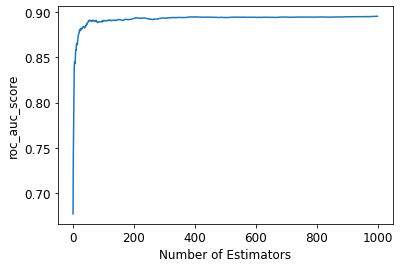

In [10]:
rf_size_vs_score(m, 1000)

We should be able to get away with using between 125 and 600 estimators.

In [225]:
%%time
m = rf(xs, y, n_estimators=50,
              class_weight='balanced', criterion='entropy',
              max_features='sqrt', max_leaf_nodes=500,
              min_samples_split=5, min_samples_leaf=5)
m_roc(y, xs), m_roc(valid_y, valid_xs)

CPU times: user 6.39 s, sys: 175 ms, total: 6.57 s
Wall time: 1.49 s


(0.9925714319746303, 0.8860721959492174)

In [226]:
%%time
m = rf(xs, y, n_estimators=100,
              class_weight='balanced', criterion='entropy',
              max_features='sqrt', max_leaf_nodes=500,
              min_samples_split=5, min_samples_leaf=5)
m_roc(y, xs), m_roc(valid_y, valid_xs)

CPU times: user 13.1 s, sys: 253 ms, total: 13.4 s
Wall time: 2.85 s


(0.9936973150298137, 0.8898411144755679)

In [234]:
%%time
m = rf(xs, y, n_estimators=200,
              class_weight='balanced', criterion='entropy',
              max_features='sqrt', max_leaf_nodes=500,
              min_samples_split=5, min_samples_leaf=5)
m_roc(y, xs), m_roc(valid_y, valid_xs)

CPU times: user 43 s, sys: 548 ms, total: 43.5 s
Wall time: 7.82 s


(0.9937181098022796, 0.895634377478088)

In [235]:
%%time
m = rf(xs, y, n_estimators=400,
              class_weight='balanced', criterion='entropy',
              max_features='sqrt', max_leaf_nodes=500,
              min_samples_split=5, min_samples_leaf=5)
m_roc(y, xs), m_roc(valid_y, valid_xs)

CPU times: user 1min 30s, sys: 1.19 s, total: 1min 31s
Wall time: 16.9 s


(0.994030729116803, 0.8934956647361025)

In [229]:
%%time
m = rf(xs, y, n_estimators=600,
              class_weight='balanced', criterion='entropy',
              max_features='sqrt', max_leaf_nodes=500,
              min_samples_split=5, min_samples_leaf=5)
m_roc(y, xs), m_roc(valid_y, valid_xs)

CPU times: user 1min 37s, sys: 1.42 s, total: 1min 38s
Wall time: 19 s


(0.9940343921863687, 0.8943017385546679)

In [230]:
%%time
m = rf(xs, y, n_estimators=800,
              class_weight='balanced', criterion='entropy',
              max_features='sqrt', max_leaf_nodes=500,
              min_samples_split=5, min_samples_leaf=5)
m_roc(y, xs), m_roc(valid_y, valid_xs)

CPU times: user 2min 34s, sys: 2.17 s, total: 2min 36s
Wall time: 29.2 s


(0.9942317743226199, 0.8951386944221261)

In [231]:
%%time
m = rf(xs, y, n_estimators=1000,
              class_weight='balanced', criterion='entropy',
              max_features='sqrt', max_leaf_nodes=500,
              min_samples_split=5, min_samples_leaf=5)
m_roc(y, xs), m_roc(valid_y, valid_xs)

CPU times: user 3min 37s, sys: 2.84 s, total: 3min 39s
Wall time: 40.1 s


(0.9941862476008764, 0.8946513861590847)

In [232]:
%%time
m = rf(xs, y, n_estimators=1500,
              class_weight='balanced', criterion='entropy',
              max_features='sqrt', max_leaf_nodes=500,
              min_samples_split=5, min_samples_leaf=5)
m_roc(y, xs), m_roc(valid_y, valid_xs)

CPU times: user 5min 43s, sys: 4.34 s, total: 5min 48s
Wall time: 1min 2s


(0.994217097125517, 0.8929175423123327)

In [233]:
%%time
m = rf(xs, y, n_estimators=2000,
              class_weight='balanced', criterion='entropy',
              max_features='sqrt', max_leaf_nodes=500,
              min_samples_split=5, min_samples_leaf=5)
m_roc(y, xs), m_roc(valid_y, valid_xs)

CPU times: user 7min 31s, sys: 5.78 s, total: 7min 37s
Wall time: 1min 22s


(0.9941730281559474, 0.8954948848335117)

200 estimators seems optimal.

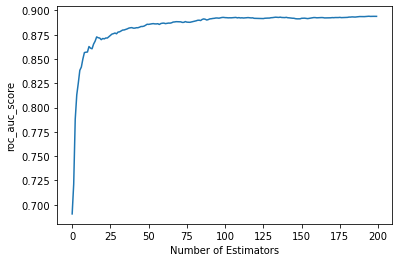

In [236]:
rf_size_vs_score(m, 200)

## OOB error

We can compare OOB error with validation error to get an idea about whether the validation set is somehow different from the training data.

In [237]:
m.oob_decision_function_.shape

(48357, 2)

In [238]:
oob_preds = m.oob_decision_function_[:,1:2]

In [239]:
roc_auc_score(y, oob_preds)

0.8989895235712049

The fact that the OOB score estimates the validation score so well is an indication that the validation data isn't much different from the training data.

## Overfitting?

One of the challenges faced when building decision tree models is their tendency to overfit. Deep trees can memorize the data set. One way to control the depth of a tree is to decrease the maximum number of leaf nodes that the tree is allowed to have. We used this parameter when optimizing our decision tree. Random forests mitigate the problem of overfitting through bagging. Random forests are typically effective with deep trees, but I would like to see for myself if increasing the value of max_leaf_nodes leads to overfitting in my Random Forest model.  

In [254]:
max_leaf_node_values = np.arange(2, 20000, step=100)
max_leaf_node_values.shape

(200,)

In [255]:
%%time
forests = [] 
for max_leaf_nodes in max_leaf_node_values:
    f =  rf(xs, y, n_estimators=50,
              class_weight='balanced', criterion='entropy',
              max_features='sqrt', max_leaf_nodes=max_leaf_nodes,
              min_samples_split=5, min_samples_leaf=5)
    forests.append(f)

CPU times: user 32min 40s, sys: 39.7 s, total: 33min 19s
Wall time: 6min 51s


In [256]:
forests[0].max_leaf_nodes

2

In [257]:
# For a set of random forests with increasing max_leaf_node_values (x-axis).
# Compute the roc_auc_score on both the training and the validation data (y-axis)
def rf_max_leaf_nodes_vs_score(forests, xs, y, valid_xs, valid_y):
    plt.plot([f.max_leaf_nodes for f in forests],[roc_auc_score(y,       f.predict_proba(xs)[:,1])       for f in forests])
    plt.plot([f.max_leaf_nodes for f in forests],[roc_auc_score(valid_y, f.predict_proba(valid_xs)[:,1]) for f in forests])
    plt.xlabel('max_leaf_nodes')
    plt.ylabel('roc_auc_score')
    plt.legend(['train', 'valid'])

CPU times: user 2min 45s, sys: 10.7 s, total: 2min 56s
Wall time: 42.5 s


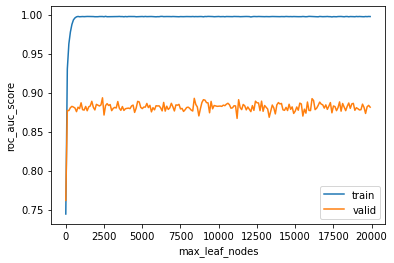

In [259]:
%%time
rf_max_leaf_nodes_vs_score(forests, xs, y, valid_xs, valid_y)

Increasing the value of max_leaf_nodes doesn't seem to lead to overfitting with the RandomForestClassifier. Let's take a closer look at the early part of the plot.

In [260]:
max_leaf_node_values = np.arange(2, 2000, step=10)
max_leaf_node_values.shape

(200,)

In [261]:
%%time
forests = [] 
for max_leaf_nodes in max_leaf_node_values:
    f =  rf(xs, y, n_estimators=50,
              class_weight='balanced', criterion='entropy',
              max_features='sqrt', max_leaf_nodes=max_leaf_nodes,
              min_samples_split=5, min_samples_leaf=5)
    forests.append(f)

CPU times: user 31min 40s, sys: 39.6 s, total: 32min 20s
Wall time: 6min 35s


CPU times: user 2min 50s, sys: 13.2 s, total: 3min 3s
Wall time: 45.7 s


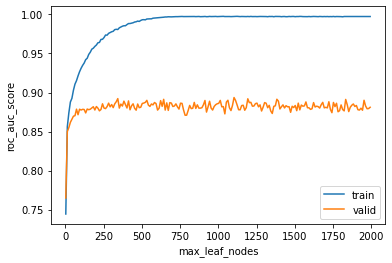

In [262]:
%%time
rf_max_leaf_nodes_vs_score(forests, xs, y, valid_xs, valid_y)

In [263]:
max_leaf_node_values = np.arange(2, 1000, step=10)
max_leaf_node_values.shape

(100,)

In [264]:
%%time
forests = [] 
for max_leaf_nodes in max_leaf_node_values:
    f =  rf(xs, y, n_estimators=50,
              class_weight='balanced', criterion='entropy',
              max_features='sqrt', max_leaf_nodes=max_leaf_nodes,
              min_samples_split=5, min_samples_leaf=5)
    forests.append(f)

CPU times: user 14min 52s, sys: 19.1 s, total: 15min 11s
Wall time: 3min 19s


CPU times: user 1min 19s, sys: 5.73 s, total: 1min 24s
Wall time: 22 s


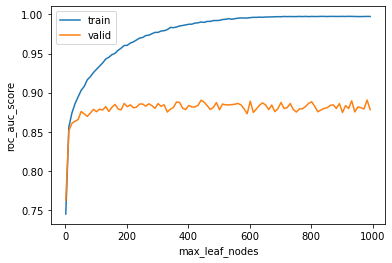

In [265]:
%%time
rf_max_leaf_nodes_vs_score(forests, xs, y, valid_xs, valid_y)

In [272]:
%%time
m = rf(xs, y, n_estimators=1000,
              class_weight='balanced', criterion='entropy',
              max_features='sqrt', max_leaf_nodes=500,
              min_samples_split=5, min_samples_leaf=5)
m_roc(y, xs), m_roc(valid_y, valid_xs)

CPU times: user 3min 24s, sys: 2.9 s, total: 3min 27s
Wall time: 38.6 s


(0.9942691775023338, 0.8942794930109735)

We can see that both the training score and the validation score continue to improve as max_leaf_nodes increases. Both scores saturate. The validation score saturates more quickly than the training score. The value of 500 settled on for max_leaf_nodes by the grid search maximizes the validation score without saturating the training score. This model might generalize a little better than a model like the one below which has a max_leaf_nodes value in the region where both scores are saturated. 

In [273]:
%%time
m = rf(xs, y, n_estimators=1000,
              class_weight='balanced', criterion='entropy',
              max_features='sqrt', max_leaf_nodes=800,
              min_samples_split=5, min_samples_leaf=5)
m_roc(y, xs), m_roc(valid_y, valid_xs)

CPU times: user 2min 34s, sys: 2.31 s, total: 2min 36s
Wall time: 29.4 s


(0.9979923139331355, 0.8946202423979125)

# Model interpretation

Questions:

1. How confident are we in our predictions using a particular row?
2. What are the most important factors when predicting a particular row and how did the influence it?
3. Overall which columns are strongest predictors, which can we trow away?
4. Which columns are redundant, so both are not needed?
5. How do predictions vary as we vary these colummns?

## Tree variance for prediction confidence

The first question can be answered by looking at the variance in the predictions across the trees in the random forest. 

In [295]:
%%time
m = rf(xs, y, n_estimators=1000,
              class_weight='balanced', criterion='entropy',
              max_features='sqrt', max_leaf_nodes=500,
              min_samples_split=5, min_samples_leaf=5)
m_roc(y, xs), m_roc(valid_y, valid_xs)

CPU times: user 2min 25s, sys: 2.35 s, total: 2min 28s
Wall time: 29.2 s


(0.9941584381747867, 0.8936165758088872)

In [296]:
preds = np.stack([t.predict_proba(valid_xs) for t in m.estimators_])
preds.shape, preds[:,:,1:2].std(0).transpose(), preds[:,:,1:2].std(0).transpose().mean()

((1000, 10697, 2),
 array([[0.12144092, 0.13298558, 0.14730954, ..., 0.21170099, 0.37925361, 0.2149253 ]]),
 0.24790245900605834)

In [297]:
%%time
m = rf(xs, y, n_estimators=200,
              class_weight='balanced', criterion='entropy',
              max_features='sqrt', max_leaf_nodes=500,
              min_samples_split=5, min_samples_leaf=5)
m_roc(y, xs), m_roc(valid_y, valid_xs)

CPU times: user 34.1 s, sys: 590 ms, total: 34.7 s
Wall time: 6.58 s


(0.9937275042051789, 0.8915739114732046)

In [298]:
preds = np.stack([t.predict_proba(valid_xs) for t in m.estimators_])
preds.shape, preds[:,:,1:2].std(0).transpose(), preds[:,:,1:2].std(0).transpose().mean()

((200, 10697, 2),
 array([[0.14833364, 0.09019482, 0.15496972, ..., 0.21915558, 0.37834613, 0.22049961]]),
 0.24329077372031582)

Decreasing the number of estimators from 1000 to 200 doesn't have a negative impact on the confidence of the predictions obtained from the model. 

The larger the standard deviation across the trees for a particular row of data, the less confident we can be in its prediction. The trees don't agree. In cases where confident predictions are desired, these rows can be put through a different classifier with the aim of obtaining more confidant predictions.

## Feature importance

The second question is about feature importance.

In [300]:
%%time
m = rf(xs, y, n_estimators=200,
              class_weight='balanced', criterion='entropy',
              max_features='sqrt', max_leaf_nodes=500,
              min_samples_split=5, min_samples_leaf=5)
m_roc(y, xs), m_roc(valid_y, valid_xs)

CPU times: user 30.6 s, sys: 596 ms, total: 31.2 s
Wall time: 6.15 s


(0.9937317030298171, 0.8883797131110001)

In [301]:
def rf_feature_importance(m, df):
    return pd.DataFrame({'cols': df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

In [302]:
fi = rf_feature_importance(m, xs)
fi[:10]

,cols,imp
79,TransactionAmt,0.041760
98,D3,0.040658
77,TransactionID,0.037360
78,TransactionDT,0.037076
94,C13,0.036253
82,C1,0.032772
95,C14,0.031364
1,card1,0.030906
97,D2,0.029560
2,card2,0.028010


<AxesSubplot:ylabel='cols'>

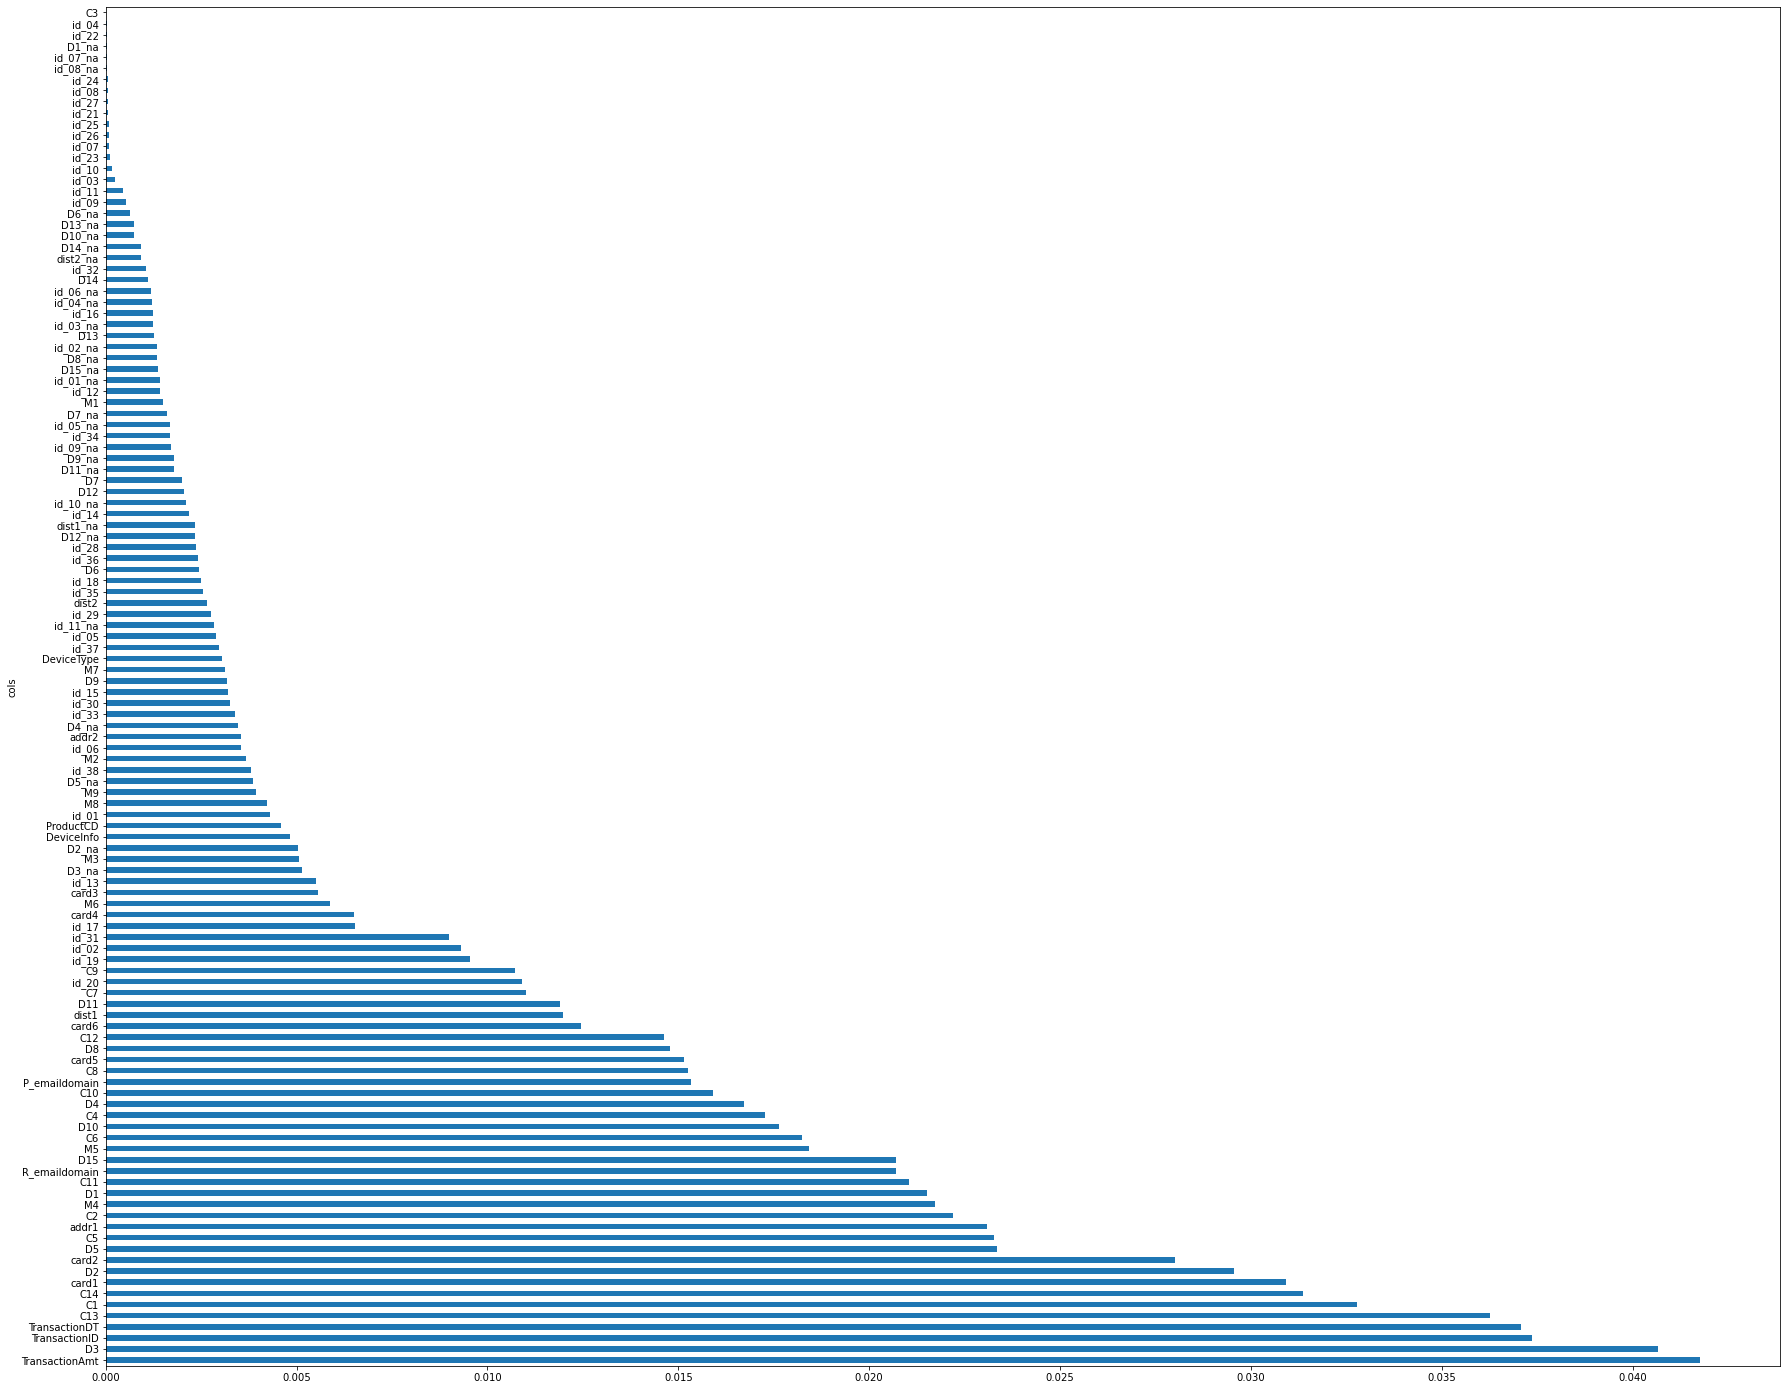

In [303]:
def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize=(30,25), legend=False)
                   
plot_fi(fi)

## Removing low-importance features

In [340]:
to_keep = fi[fi.imp>0.0001].cols
print(f' n_features: {len(to_keep)}')

xs_imp       = xs[to_keep]
valid_xs_imp = valid_xs[to_keep]

m = rf(xs_imp, y, n_estimators=200,  criterion='entropy', class_weight='balanced')
m_roc(y, xs_imp), m_roc(valid_y, valid_xs_imp)

 n_features: 120


(0.999999467798778, 0.8571243494597073)

In [320]:
to_keep = fi[fi.imp>0.001].cols
print(f' n_features: {len(to_keep)}')

xs_imp       = xs[to_keep]
valid_xs_imp = valid_xs[to_keep]

m = rf(xs_imp, y, n_estimators=200,  criterion='entropy', class_weight='balanced')
m_roc(y, xs_imp), m_roc(valid_y, valid_xs_imp)

 n_features: 97


(0.9999996008490836, 0.8487602504421524)

In [321]:
#0.003 lower
to_keep = fi[fi.imp>0.002].cols
print(f' n_features: {len(to_keep)}')

xs_imp       = xs[to_keep]
valid_xs_imp = valid_xs[to_keep]

m = rf(xs_imp, y, n_estimators=200,  criterion='entropy', class_weight='balanced')
m_roc(y, xs_imp), m_roc(valid_y, valid_xs_imp)

 n_features: 79


(0.999998518303416, 0.8595160191248095)

In [322]:
#0.003 lower
to_keep = fi[fi.imp>0.003].cols
print(f' n_features: {len(to_keep)}')

xs_imp       = xs[to_keep]
valid_xs_imp = valid_xs[to_keep]

m = rf(xs_imp, y, n_estimators=200,  criterion='entropy', class_weight='balanced')
m_roc(y, xs_imp), m_roc(valid_y, valid_xs_imp)

 n_features: 68


(0.999999618992307, 0.8504375044575851)

In [323]:
#0.003 lower
to_keep = fi[fi.imp>0.004].cols
print(f' n_features: {len(to_keep)}')

xs_imp       = xs[to_keep]
valid_xs_imp = valid_xs[to_keep]

m = rf(xs_imp, y, n_estimators=200,  criterion='entropy', class_weight='balanced')
m_roc(y, xs_imp), m_roc(valid_y, valid_xs_imp)

 n_features: 57


(0.9999998548542122, 0.844443171166724)

In [324]:
#0.003 lower
to_keep = fi[fi.imp>0.005].cols
print(f' n_features: {len(to_keep)}')

xs_imp       = xs[to_keep]
valid_xs_imp = valid_xs[to_keep]

m = rf(xs_imp, y, n_estimators=200,  criterion='entropy', class_weight='balanced')
m_roc(y, xs_imp), m_roc(valid_y, valid_xs_imp)

 n_features: 50


(0.9999991654117201, 0.8491933874681158)

In [325]:
#0.003 lower
to_keep = fi[fi.imp>0.006].cols
print(f' n_features: {len(to_keep)}')

xs_imp       = xs[to_keep]
valid_xs_imp = valid_xs[to_keep]

m = rf(xs_imp, y, n_estimators=200,  criterion='entropy', class_weight='balanced')
m_roc(y, xs_imp), m_roc(valid_y, valid_xs_imp)

 n_features: 42


(0.9999968370313738, 0.8519353865871501)

In [326]:
#0.003 lower
to_keep = fi[fi.imp>0.007].cols
print(f' n_features: {len(to_keep)}')

xs_imp       = xs[to_keep]
valid_xs_imp = valid_xs[to_keep]

m = rf(xs_imp, y, n_estimators=200,  criterion='entropy', class_weight='balanced')
m_roc(y, xs_imp), m_roc(valid_y, valid_xs_imp)

 n_features: 40


(0.9999996492310127, 0.8464883846352955)

In [327]:
#0.003 lower
to_keep = fi[fi.imp>0.008].cols
print(f' n_features: {len(to_keep)}')

xs_imp       = xs[to_keep]
valid_xs_imp = valid_xs[to_keep]

m = rf(xs_imp, y, n_estimators=200,  criterion='entropy', class_weight='balanced')
m_roc(y, xs_imp), m_roc(valid_y, valid_xs_imp)

 n_features: 38


(0.999995591196695, 0.8541205715645744)

In [328]:
#0.003 lower
to_keep = fi[fi.imp>0.009].cols
print(f' n_features: {len(to_keep)}')

xs_imp       = xs[to_keep]
valid_xs_imp = valid_xs[to_keep]

m = rf(xs_imp, y, n_estimators=200,  criterion='entropy', class_weight='balanced')
m_roc(y, xs_imp), m_roc(valid_y, valid_xs_imp)

 n_features: 37


(0.9999990505046381, 0.8507539095191043)

In [344]:
#0.003 lower
to_keep = fi[fi.imp>0.01].cols
print(f' n_features: {len(to_keep)}')

xs_imp       = xs[to_keep]
valid_xs_imp = valid_xs[to_keep]

m = rf(xs_imp, y, n_estimators=200,  criterion='entropy', class_weight='balanced')
m_roc(y, xs_imp), m_roc(valid_y, valid_xs_imp)

 n_features: 35


(0.9999989174543326, 0.8474139595936445)

In [437]:
#0.003 lower
to_keep = fi[fi.imp>0.002].cols
print(f' n_features: {len(to_keep)}')

xs_imp       = xs[to_keep]
valid_xs_imp = valid_xs[to_keep]

m = rf(xs_imp, y, n_estimators=200,  criterion='entropy', class_weight='balanced')
m_roc(y, xs_imp), m_roc(valid_y, valid_xs_imp)

 n_features: 79


(0.999997677667395, 0.8557429321733863)

In [438]:
xs_imp.columns.shape

(79,)

In [439]:
m.feature_importances_.shape

(79,)

<AxesSubplot:ylabel='cols'>

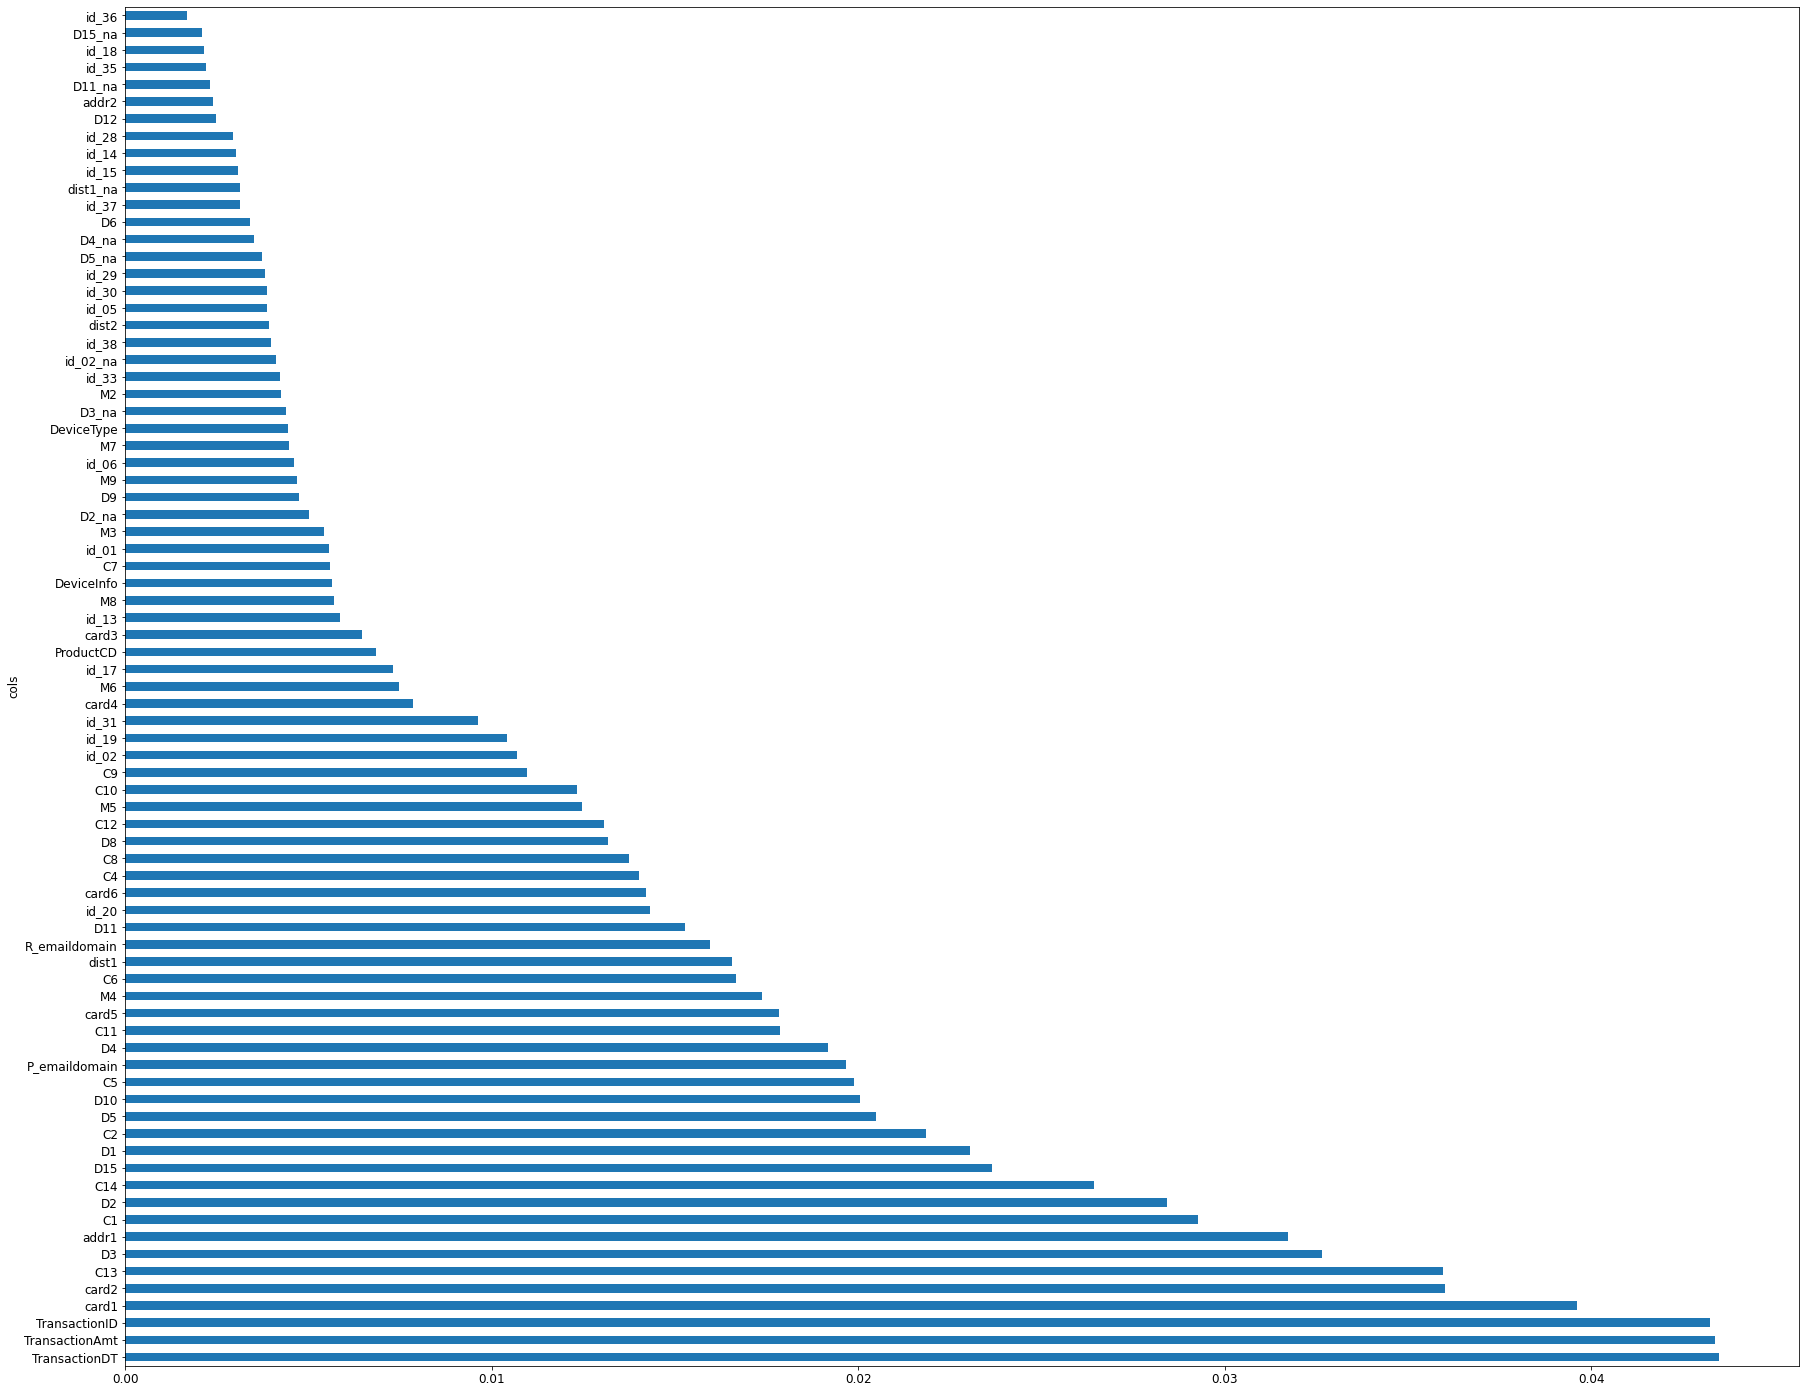

In [440]:
plot_fi(rf_feature_importance(m, xs_imp))

##  Remove redundant features

In [441]:
xs_imp.shape, valid_xs_imp.shape

((48378, 79), (10676, 79))

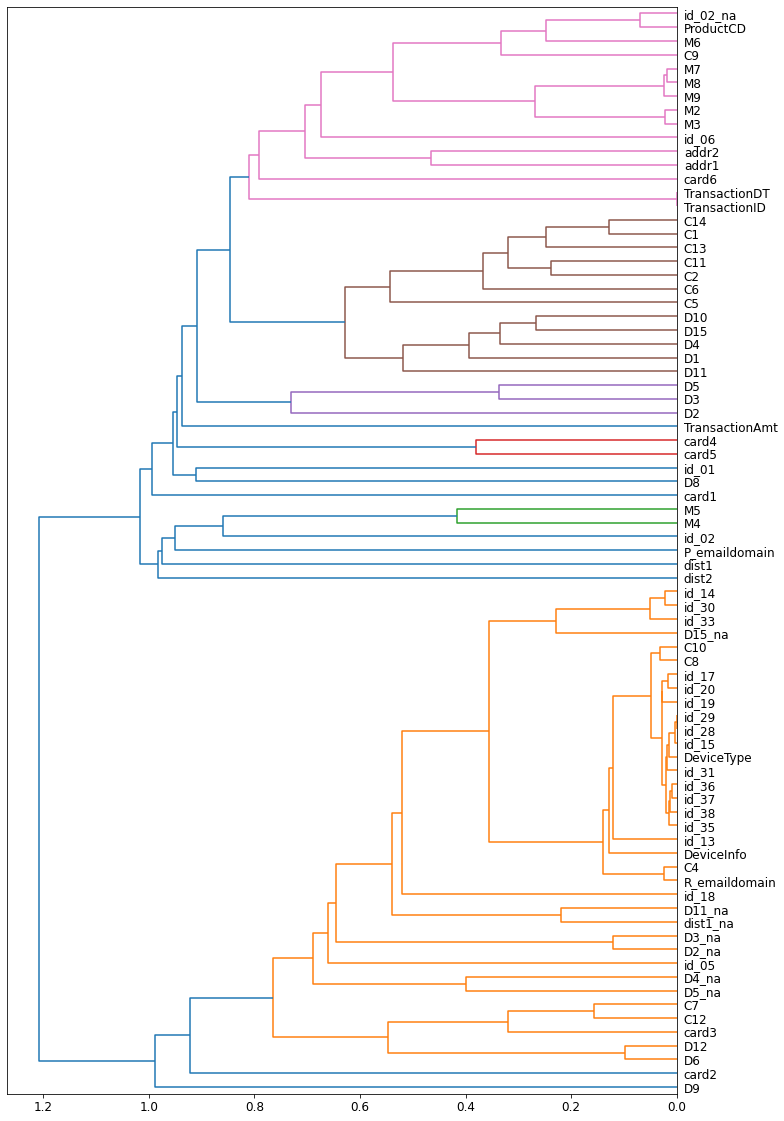

In [444]:
cluster_columns(xs_imp, figsize=(12,20))

This suggests that one of TransactionID or TransactionDT is redundant.
Other possible redundant groups: (M7, M8), (M2, M3), (id_14, id_30), (C10, C8), 
 (id_17, id_20),(id_29, id_28, id_15, DeviceType), (id_36, id_37, id_38, id_35),(C4, R_emaildomain).

In [445]:
def get_oob(df):
    m = RandomForestClassifier(n_estimators=200,  criterion='entropy', class_weight='balanced',
                               n_jobs=-1, oob_score=True)
    m.fit(df, y)
    return roc_auc_score(y,  m.oob_decision_function_[:,1:2])

In [446]:
get_oob(xs_imp)

0.8884370104051145

In [447]:
{c:get_oob(xs_imp.drop(c, axis=1)) for c in (
    'TransactionID', 'TransactionDT', 'C10', 'C8', 'C4', 'R_emaildomain', 
    'M7', 'M8', 'M2', 'M3', 'id_14', 'id_30', 'id_17', 'id_20', 'id_29',
    'id_28', 'id_15', 'DeviceType', 'id_36', 'id_37', 'id_38', 'id_35')}

{'TransactionID': 0.8953759829877525,
 'TransactionDT': 0.8930170373577196,
 'C10': 0.8915396104790227,
 'C8': 0.89151528041634,
 'C4': 0.8914427559043613,
 'R_emaildomain': 0.8920820565745381,
 'M7': 0.8931107350114958,
 'M8': 0.8901882790034911,
 'M2': 0.8917399842391028,
 'M3': 0.8848289159341723,
 'id_14': 0.8927779882929278,
 'id_30': 0.8910940552446156,
 'id_17': 0.8930934747582283,
 'id_20': 0.8893255747749007,
 'id_29': 0.8872495666672504,
 'id_28': 0.8890919505339284,
 'id_15': 0.8921985844511897,
 'DeviceType': 0.8963351547355701,
 'id_36': 0.8914879022921134,
 'id_37': 0.8943642563692633,
 'id_38': 0.8897577282148994,
 'id_35': 0.8930063086649038}

In [448]:
to_drop = ['TransactionID', 'C10', 'C4', 'M8', 'M3', 'id_30', 'id_20',
          'id_29', 'id_28', 'id_15', 'id_36', 'id_38', 'id_35']
get_oob(xs_imp.drop(to_drop, axis=1))

0.8968967721705594

In [449]:
xs_final = xs_imp.drop(to_drop, axis=1)
valid_xs_final = valid_xs_imp.drop(to_drop, axis=1)

In [450]:
xs_final.shape, valid_xs_final.shape

((48378, 66), (10676, 66))

In [456]:
(path/'xs_final.pkl').save(xs_final)
(path/'valid_xs_final.pkl').save(valid_xs_final)

In [25]:
xs_final = (path/'xs_final.pkl').load()
valid_xs_final = (path/'valid_xs_final.pkl').load()

In [27]:
m = RandomForestClassifier(max_samples=0.7, oob_score=True,
                           n_estimators=1000,  criterion='entropy', 
                           class_weight='balanced').fit(xs_final, y)
m_roc(y, xs_final), m_roc(valid_y, valid_xs_final)

(1.0, 0.8540103840695328)

## Partial dependance

In [460]:
valid_xs_final.columns

Index(['TransactionDT', 'TransactionAmt', 'card1', 'card2', 'C13', 'D3',
       'addr1', 'D2', 'C1', 'C14', 'D1', 'D15', 'C2', 'C5', 'D5', 'D4',
       'P_emaildomain', 'D10', 'card5', 'C11', 'C6', 'M4', 'dist1', 'C8',
       'D11', 'R_emaildomain', 'card6', 'M5', 'C12', 'D8', 'C9', 'id_02',
       'id_31', 'id_19', 'card4', 'M6', 'id_17', 'ProductCD', 'id_13',
       'DeviceInfo', 'C7', 'card3', 'id_01', 'D2_na', 'M9', 'M7', 'DeviceType',
       'D9', 'D3_na', 'id_06', 'addr2', 'M2', 'D5_na', 'id_33', 'id_05',
       'D4_na', 'dist2', 'dist1_na', 'D6', 'id_37', 'id_02_na', 'id_14',
       'id_18', 'D12', 'D11_na', 'D15_na'],
      dtype='object')

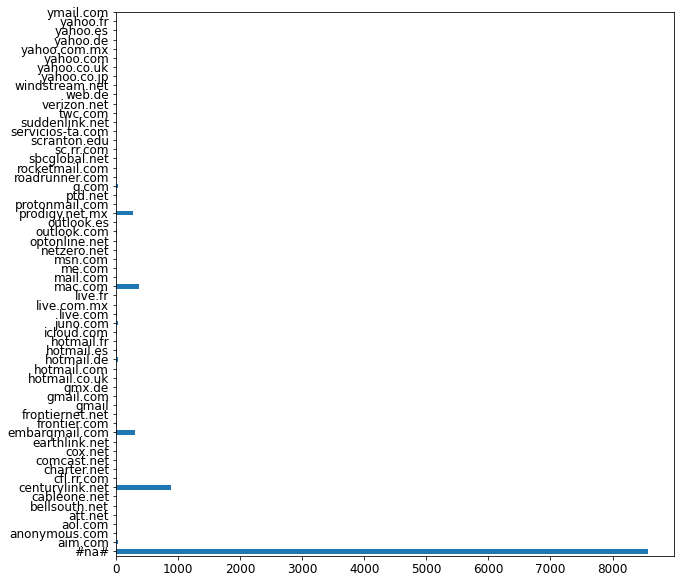

In [461]:
p = valid_xs_final['R_emaildomain'].value_counts(sort=False).plot.barh(figsize=(10,10))
c = to.classes['R_emaildomain']
plt.yticks(range(len(c)), c);

In [380]:
# I want to look at the Fraud column for all values in the training set where R_emaildomain is missing
n = 1000
pd.options.display.max_rows = n
train_ss[['isFraud','R_emaildomain']].head(n)

,isFraud,R_emaildomain
57195,0,NaN
312877,0,NaN
195195,1,NaN
21600,0,NaN
12253,0,NaN
377675,0,anonymous.com
160611,0,gmail.com
86738,0,hotmail.com
426550,0,NaN
34293,0,NaN


In [462]:
pd.options.display.max_rows = 20

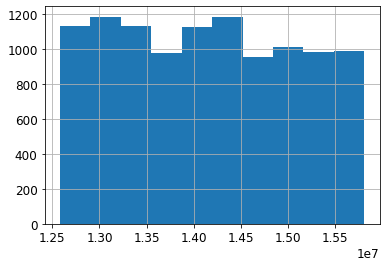

In [463]:
ax = valid_xs_final['TransactionDT'].hist()

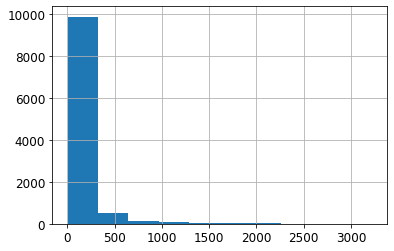

In [464]:
ax = valid_xs_final['TransactionAmt'].hist()

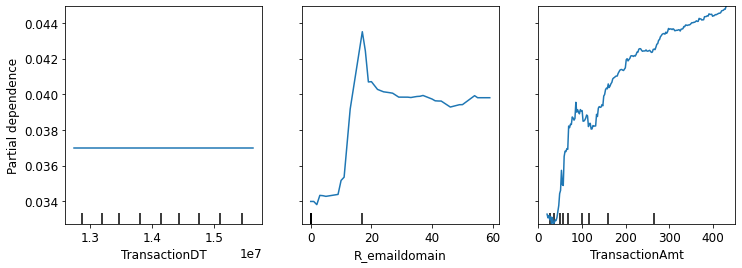

In [465]:
from sklearn.inspection import plot_partial_dependence

_, ax = plt.subplots(figsize=(12,4))
plot_partial_dependence(m, valid_xs_final, ['TransactionDT','R_emaildomain', 'TransactionAmt'],
                        grid_resolution=200, ax=ax)

In [467]:
valid_xs_final['R_emaildomain'].unique()

array([ 0,  2, 55, 17, 20, 36, 54, 35,  5, 42, 31, 10, 24, 43, 22,  3, 32, 57, 25, 11, 27, 50, 18, 40, 58, 34,  4, 26, 46, 59, 56, 19, 49, 29, 37,  9, 41, 13, 23,  1, 33], dtype=int8)

## Tree Interperator

In [2]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

In [3]:
from treeinterpreter import treeinterpreter
from waterfall_chart import plot as waterfall

ModuleNotFoundError: No module named 'treeinterpreter'

In [470]:
row = valid_xs_final[:5]

In [471]:
prediction,bias,contributions = treeinterpreter.predict(m, row.values)

In [472]:
assert torch.allclose(torch.tensor(prediction[0,1]), torch.tensor(bias[0,1] + contributions[0].sum(axis=0)[1]))

In [1]:
waterfall(valid_xs_final.columns, contributions[1][:,1], threshold=0.08, 
          rotation_value=90, formatting='{:,.3f}')

NameError: name 'waterfall' is not defined

## Finding Out-of-Domain Data

In [474]:
df_dom = pd.concat([xs_final, valid_xs_final])
is_valid = np.array([0]*len(xs_final) + [1]*len(valid_xs_final))

m = rf(df_dom, is_valid)
rf_feature_importance(m, df_dom)[:6]

,cols,imp
0,TransactionDT,0.814529
2,card1,0.018919
11,D15,0.017313
32,id_31,0.010485
17,D10,0.009992
15,D4,0.008364


In [475]:
m = rf(xs_final, y, n_estimators=200,  criterion='entropy', class_weight='balanced')
print('orig', m_roc(valid_y, valid_xs_final))

for c in ('TransactionDT','card1','D15'):
    m = rf(xs_final.drop(c,axis=1), y, n_estimators=200,  criterion='entropy', class_weight='balanced')
    print(c, m_roc(valid_y, valid_xs_final.drop(c,axis=1)))

orig 0.847393925503637
TransactionDT 0.858746175826119
card1 0.8469418228724663
D15 0.8476297935233259


Can try droping columns that are older to see if keeping just more recent data makes a difference

<AxesSubplot:>

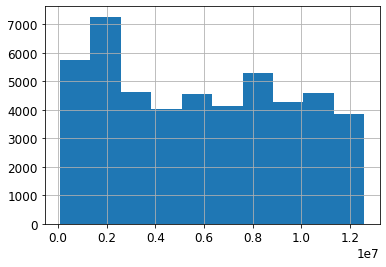

In [476]:
xs['TransactionDT'].hist()

In [477]:
filt = xs['TransactionDT']>=0
xs_filt = xs_final[filt]
y_filt = y[filt]

In [478]:
m = rf(xs_filt, y_filt, n_estimators=1000, criterion='entropy', class_weight='balanced')
m_roc(y_filt, xs_filt), m_roc(valid_y, valid_xs_final)

(0.9999999758090353, 0.8601589798534522)

In [479]:
filt = xs['TransactionDT']>0.6e7
xs_filt = xs_final[filt]
y_filt = y[filt]
m = rf(xs_filt, y_filt, n_estimators=1000, criterion='entropy', class_weight='balanced')
m_roc(y_filt, xs_filt), m_roc(valid_y, valid_xs_final)

(1.0, 0.8536255959807876)

In [480]:
filt = xs['TransactionDT']>0.8e7
xs_filt = xs_final[filt]
y_filt = y[filt]
m = rf(xs_filt, y_filt, n_estimators=1000, criterion='entropy', class_weight='balanced')
m_roc(y_filt, xs_filt), m_roc(valid_y, valid_xs_final)

(1.0, 0.8484385029566309)

In [481]:
filt = xs['TransactionDT']>1e7
xs_filt = xs_final[filt]
y_filt = y[filt]
m = rf(xs_filt, y_filt, n_estimators=1000, criterion='entropy', class_weight='balanced')
m_roc(y_filt, xs_filt), m_roc(valid_y, valid_xs_final)

(1.0, 0.8435094490117718)

In [482]:
filt = xs['TransactionDT']>1.2e7
xs_filt = xs_final[filt]
y_filt = y[filt]
m = rf(xs_filt, y_filt, n_estimators=1000, criterion='entropy', class_weight='balanced')
m_roc(y_filt, xs_filt), m_roc(valid_y, valid_xs_final)

(1.0, 0.7855362685145042)

In [483]:
xs[cat].nunique()

ProductCD       5
card1        5602
card2         500
card3          63
card4           5
             ... 
id_07_na        2
id_08_na        2
id_09_na        2
id_10_na        2
id_11_na        2
Length: 77, dtype: int64

In [484]:
xs_final.nunique()

TransactionDT     48214
TransactionAmt     5062
card1              5602
card2               500
C13                 782
                  ...  
id_14                21
id_18                14
D12                 461
D11_na                2
D15_na                2
Length: 66, dtype: int64

## Imbalanced learn

## RandomUnderSampler

In [30]:
xs_final = (path/'xs_final.pkl').load()
valid_xs_final = (path/'valid_xs_final.pkl').load()

In [45]:
xs_final.shape, valid_xs_final.shape

((48378, 66), (10676, 66))

In [32]:
from imblearn.under_sampling import RandomUnderSampler

In [36]:
RandomUnderSampler?

In [37]:
rus = RandomUnderSampler(random_state=42)

In [76]:
xs_final_rus, y_rus = rus.fit_resample(xs_final, y)

In [77]:
valid_xs_final_rus, valid_y_rus = rus.fit_resample(valid_xs_final, valid_y)

In [78]:
xs_final_rus.shape, valid_xs_final_rus.shape

((3548, 66), (726, 66))

In [80]:
 y_rus.shape, valid_y_rus.shape

((3548,), (726,))

In [81]:
y_rus.items

<bound method Series.items of 0       0
1       0
2       0
3       0
4       0
       ..
3543    1
3544    1
3545    1
3546    1
3547    1
Name: isFraud, Length: 3548, dtype: int8>

In [82]:
y_rus.sum()

1774

In [83]:
assert y_rus.sum()==len(y_rus)/2

In [84]:
m = RandomForestClassifier(max_samples=0.7, oob_score=True,
                           n_estimators=1000,  criterion='entropy', 
                           ).fit(xs_final_rus, y_rus)
m_roc(y_rus, xs_final_rus), m_roc(valid_y_rus, valid_xs_final_rus)

(1.0, 0.8360312364820253)

In [85]:
m = RandomForestClassifier(max_samples=0.66, oob_score=True,
                           n_estimators=1000,  criterion='entropy', 
                           ).fit(xs_final_rus, y_rus)
m_roc(y_rus, xs_final_rus), m_roc(valid_y_rus, valid_xs_final_rus)

(0.9999980934683497, 0.8380385371369594)

## RandomOverSampler

In [86]:
from imblearn.over_sampling import RandomOverSampler

In [71]:
RandomOverSampler?

In [87]:
ros = RandomOverSampler(random_state=42)

In [88]:
xs_final_ros, y_ros = ros.fit_resample(xs_final, y)
valid_xs_final_ros, valid_y_ros = ros.fit_resample(valid_xs_final, valid_y)

In [89]:
xs_final_ros.shape, valid_xs_final_ros.shape

((93208, 66), (20626, 66))

In [91]:
 y_ros.shape, valid_y_ros.shape

((93208,), (20626,))

In [93]:
y_ros.sum()

46604

In [94]:
assert y_ros.sum()==len(y_ros)/2

In [100]:
%%time
m = RandomForestClassifier(max_samples=0.7, oob_score=True,
                           n_estimators=1000,  criterion='entropy', 
                           n_jobs=-1).fit(xs_final_ros, y_ros)
m_roc(y_ros, xs_final_ros), m_roc(valid_y_ros, valid_xs_final_ros)

CPU times: user 8min 56s, sys: 8.48 s, total: 9min 5s
Wall time: 1min 43s


(0.9999999999999999, 0.8535463995180276)

In [99]:
%%time
m = RandomForestClassifier(max_samples=0.7, oob_score=True,
                           n_estimators=200,  criterion='entropy', 
                           n_jobs=-1).fit(xs_final_ros, y_ros)
m_roc(y_ros, xs_final_ros), m_roc(valid_y_ros, valid_xs_final_ros)

CPU times: user 1min 30s, sys: 1.18 s, total: 1min 31s
Wall time: 16.5 s


(1.0, 0.8529796812874453)